# Read Data

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
fn = 'data_banknote_authentication.txt'

data = pd.read_csv(fn, header=None)

data_only, label = data.iloc[:, :-1], data.iloc[:, -1]
train_data, test_data, train_label, test_label = train_test_split(data_only, label, train_size=900)

/Users/zhengcao/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
data

,0,1,2,3,4
0,3.621600,8.66610,-2.807300,-0.446990,0
1,4.545900,8.16740,-2.458600,-1.462100,0
2,3.866000,-2.63830,1.924200,0.106450,0
3,3.456600,9.52280,-4.011200,-3.594400,0
4,0.329240,-4.45520,4.571800,-0.988800,0
5,4.368400,9.67180,-3.960600,-3.162500,0
6,3.591200,3.01290,0.728880,0.564210,0
7,2.092200,-6.81000,8.463600,-0.602160,0
8,3.203200,5.75880,-0.753450,-0.612510,0
9,1.535600,9.17720,-2.271800,-0.735350,0


# Model selection

## SVM with passive learning

* linear kernel is used to carry out test experiment.

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

import random

In [5]:
def passive_indices(max_num, interval, n):
    random_list = np.arange(max_num)
    random.shuffle(random_list)
    
    res = []
    for i in range(n):
        res.append(random_list[:(i+1)*interval])
    return res

n_indice = passive_indices(900, 10, 90)
n_indice = n_indice[10:]

n_indice

[array([680,  27, 441, 373, 880, 356, 678, 243, 866, 262,  53,  14, 891,
         92, 646, 378, 635, 159,  85, 147, 682, 329, 718, 596, 585, 501,
        271, 419, 541, 526, 154, 797, 178, 810, 498, 523,  10, 359, 707,
        263, 822, 537, 208, 217, 628, 215, 568, 473, 452, 710, 353, 582,
        451, 544, 430, 135, 716, 380, 300, 326, 808, 258, 144, 664, 168,
        895, 883, 207, 870, 249,  83, 517, 559, 851, 390, 602, 429, 388,
        862,  52, 539, 307, 128, 324, 231, 277, 817, 379, 383, 858, 897,
        864, 733, 742, 850,  36,  91,  32,  50, 512,  11, 251, 400, 627,
        648,  59, 132, 520, 386, 361]),
 array([680,  27, 441, 373, 880, 356, 678, 243, 866, 262,  53,  14, 891,
         92, 646, 378, 635, 159,  85, 147, 682, 329, 718, 596, 585, 501,
        271, 419, 541, 526, 154, 797, 178, 810, 498, 523,  10, 359, 707,
        263, 822, 537, 208, 217, 628, 215, 568, 473, 452, 710, 353, 582,
        451, 544, 430, 135, 716, 380, 300, 326, 808, 258, 144, 664, 168,
        895

In [6]:
n_SVMs = 90
n_interval = 10

n_c_penalties = np.logspace(-4, 2, 20)

accuracies = []
for i, indice in zip(range(10, n_SVMs), n_indice):
    
    #obtain training data
    train_data_part = train_data.iloc[indice, :]
    train_label_part = train_label.iloc[indice]
    
    #cross valication for selecting optimal penalty
    res_c = []
    for c in n_c_penalties:
        svc = SVC(C=c, kernel='linear')
        res_c.append(np.mean(cross_val_score(svc, train_data_part, train_label_part, cv=10)))
    
    #test using optimal model
    optimal_c = n_c_penalties[np.argmax(res_c)]
    svc = SVC(C=optimal_c, kernel='linear')
    svc.fit(train_data_part, train_label_part)
    predicted_label = svc.predict(test_data)
    accuracies.append(accuracy_score(test_label, predicted_label))
    
    print('number: %d accuracy: %.4f ' % (i-10, accuracies[i-10]))


number: 0 accuracy: 0.9936 
number: 1 accuracy: 0.9873 
number: 2 accuracy: 0.9873 
number: 3 accuracy: 0.9788 
number: 4 accuracy: 0.9788 
number: 5 accuracy: 0.9788 
number: 6 accuracy: 0.9788 
number: 7 accuracy: 0.9809 
number: 8 accuracy: 0.9936 
number: 9 accuracy: 0.9936 
number: 10 accuracy: 0.9936 
number: 11 accuracy: 0.9936 
number: 12 accuracy: 0.9936 
number: 13 accuracy: 0.9936 
number: 14 accuracy: 0.9936 
number: 15 accuracy: 0.9936 
number: 16 accuracy: 0.9936 
number: 17 accuracy: 0.9936 
number: 18 accuracy: 0.9788 
number: 19 accuracy: 0.9788 
number: 20 accuracy: 0.9788 
number: 21 accuracy: 0.9788 
number: 22 accuracy: 0.9788 
number: 23 accuracy: 0.9936 
number: 24 accuracy: 0.9936 
number: 25 accuracy: 0.9936 
number: 26 accuracy: 0.9936 
number: 27 accuracy: 0.9936 
number: 28 accuracy: 0.9936 
number: 29 accuracy: 0.9788 
number: 30 accuracy: 0.9788 
number: 31 accuracy: 0.9788 
number: 32 accuracy: 0.9788 
number: 33 accuracy: 0.9809 
number: 34 accuracy: 0.9

In [17]:
import matplotlib.pyplot as plt

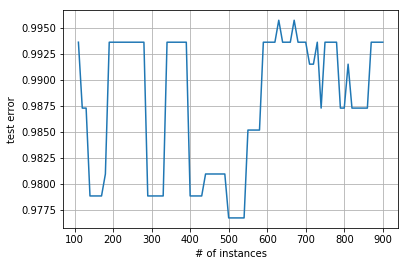

In [20]:
x_axis = np.arange(110, 901, 10)

plt.figure()
plt.plot(x_axis, accuracies)
plt.xlabel('# of instances')
plt.ylabel('test error')
plt.grid(True)

plt.show()

## SVM with active learning

In [36]:
def k_smallest_indice(data, k):
    '''
    parameters
    data: np.array 1d
    
    return
    np.array 1d
    '''
    sorted_indice = np.array([i for val, i in sorted(zip(data, range(data.shape[0])))])
    return sorted_indice[:k]

In [62]:


#randomly select 100 data points
random_list = np.arange(900)
random.shuffle(random_list)
indice = train_data.index[random_list[:110]]

# print(indice)

interval = 10
iterations = (900 - 110) / interval + 1

train_data_part = train_data.loc[indice, :]
train_label_part = train_label.loc[indice]

accuracies = []

for i in range(int(iterations)):
# for i in range(1):    
    res_c = []
    for c in n_c_penalties:
        svc = SVC(C=c, kernel='linear')
        res_c.append(np.mean(cross_val_score(svc, train_data_part, train_label_part, cv=10)))
    
    #test using optimal model
    optimal_c = n_c_penalties[np.argmax(res_c)]
    svc = SVC(C=optimal_c, kernel='linear')
    svc.fit(train_data_part, train_label_part)
    predicted_label = svc.predict(test_data)
    accuracies.append(accuracy_score(test_label, predicted_label))
    print('number: %d accuracy: %.4f ' % (i, accuracies[i-10])) 
    
    remaining_data = train_data.drop(indice)
    #Actively select 10 more points added to the training set.
    remaining_data_dist = svc.decision_function(remaining_data)
    
    remaining_data_dist = np.array([ np.abs(val) for val in remaining_data_dist])
    smallest_10_dist_indice = k_smallest_indice(remaining_data, 10)
    indice = np.r_[indice, remaining_data.index[smallest_10_dist_indice]]
    
    train_data_part = train_data.loc[indice, :]
    train_label_part = train_label.loc[indice]
        


number: 0 accuracy: 0.9894 
number: 1 accuracy: 0.9894 
number: 2 accuracy: 0.9746 
number: 3 accuracy: 0.9831 
number: 4 accuracy: 0.9767 
number: 5 accuracy: 0.9873 
number: 6 accuracy: 0.9894 
number: 7 accuracy: 0.9873 
number: 8 accuracy: 0.9873 
number: 9 accuracy: 0.9873 
number: 10 accuracy: 0.9936 
number: 11 accuracy: 0.9873 
number: 12 accuracy: 0.9873 
number: 13 accuracy: 0.9788 
number: 14 accuracy: 0.9788 
number: 15 accuracy: 0.9788 
number: 16 accuracy: 0.9788 
number: 17 accuracy: 0.9809 
number: 18 accuracy: 0.9936 
number: 19 accuracy: 0.9936 
number: 20 accuracy: 0.9936 
number: 21 accuracy: 0.9936 
number: 22 accuracy: 0.9936 
number: 23 accuracy: 0.9936 
number: 24 accuracy: 0.9936 
number: 25 accuracy: 0.9936 
number: 26 accuracy: 0.9936 
number: 27 accuracy: 0.9936 
number: 28 accuracy: 0.9788 
number: 29 accuracy: 0.9788 
number: 30 accuracy: 0.9788 
number: 31 accuracy: 0.9788 
number: 32 accuracy: 0.9788 
number: 33 accuracy: 0.9936 
number: 34 accuracy: 0.9

(583     0
 629     0
 998     1
 1177    1
 372     0
 989     1
 135     0
 886     1
 800     1
 965     1
 765     1
 519     0
 422     0
 1293    1
 323     0
 356     0
 1121    1
 528     0
 1113    1
 335     0
 473     0
 265     0
 303     0
 1304    1
 167     0
 1136    1
 1036    1
 1194    1
 453     0
 814     1
        ..
 1201    1
 697     0
 1071    1
 430     0
 457     0
 411     0
 138     0
 307     0
 277     0
 715     0
 1347    1
 11      0
 1232    1
 874     1
 735     0
 688     0
 896     1
 198     0
 418     0
 681     0
 1158    1
 498     0
 593     0
 1021    1
 143     0
 195     0
 605     0
 264     0
 203     0
 542     0
 Name: 4, Length: 900, dtype: int64,
              0          1          2         3
 583   2.367800  -6.839000   8.420700 -0.448290
 629   3.757000  -5.423600   3.825500 -1.252600
 998  -3.086600  -6.636200  10.540500 -0.891820
 1177 -0.895420   2.027900  -2.365200 -1.274600
 372   0.743070  11.170000  -1.382400 -4.072800
 989